In [1]:
import pandas as pd 
import glob
import re

## Data retrieval and cleaning 

In [2]:
# Convert all datasets into panda dataframes and store them within a list. 
path = ("FPDatasetsFINAL")
all_files = glob.glob(path + "/*.csv")
all_dataframes = [] 
for file in all_files: 
    df = pd.read_csv(file)
    all_dataframes.append(df)

In [3]:
def cleanFiles(file): 
    '''
    Function takes in a file and cleans data by: 
    - removing the note column since we won't perform any analysis on that. 
    - dealing with missing values 
    '''
    file = file.drop(['Note'], axis=1) 
    file = file.fillna(0)
    return file 

## How much does city immersion cost us, temporally and financially? 

In [4]:
def costCalculator(file): 
    '''
    Function takes in a dataframe containing money spent on transport 
    and returns the total amount spent per month for that dataframe.  
    '''
    monthwise = dict()
    total = 0 
    
    for index, row in file.iterrows():
        date = row['Date']
        cost_at_date = row['Charge']
        extract_month = (re.findall('-(.*)-', date))[0] 

    
        if extract_month in monthwise.keys(): 
            monthwise[extract_month] += cost_at_date
        else: 
            monthwise[extract_month] = cost_at_date
        total += cost_at_date

    return total, monthwise 

In [5]:
def timeCalculator(file): 
    '''
    Function takes in a dataframe containing start and end times of journeys 
    and returns the total time spent on transit as well as a monthly breakdown.
    '''
    total_time = 0 
    
    monthly_time = dict()
    
    start_end = file[~file['Journey/Action'].str.contains("Bus journey|Topped up|Topped-up|tram|No touch out|No touch-out|Pay as you go balance adjusted|No touch-in", regex=True)]
    for index, row in start_end.iterrows():
        
        date = row['Date']
        extract_month = (re.findall('-(.*)-', date))[0] # Extract the month from the date string. 
        
        
        start_time = pd.to_datetime(row['Start Time'])
        end_time = pd.to_datetime(row['End Time'])
        
        if int(row['End Time'][:2]) < int(row['Start Time'][:2]):
            first_half = pd.to_datetime('23:59') - start_time
            second_half =  end_time - pd.to_datetime('00:00')
            time = (first_half + second_half).total_seconds() / 60
        else: 
            time =  (end_time - start_time).total_seconds() / 60
            
            
        if extract_month in monthly_time.keys(): 
            monthly_time[extract_month] += time 
        else: 
            monthly_time[extract_month] = time
        
        total_time += time 
    return total_time, monthly_time

### Results and visualization 

In [6]:
def generateTimeCostResults(all_dataframes): 
    results_df = pd.DataFrame() 

    # Time and cost results for the entire period 
    totalTimeList = []
    totalCostList = []


    # Time and cost results for october
    octTimeList = []
    octCostList = []
    
    # Time and cost results for november
    novTimeList = []
    novCostList = [] 
    
    # Time and cost results for november
    decTimeList = []
    decCostList = [] 



    for file in all_dataframes: 
        cleaned_file = cleanFiles(file)

        cost_results = costCalculator(cleaned_file)
        time_results = timeCalculator(cleaned_file)

        totalTimeList.append(time_results[0])
        totalCostList.append(cost_results[0])

        
        if 'Oct' in time_results[1].keys(): 
            octTimeList.append(time_results[1]['Oct'])
            octCostList.append(cost_results[1]['Oct'])
            
        else: 
            octTimeList.append(0)
            octCostList.append(0)
            
            
        if 'Nov' in time_results[1].keys():
            novTimeList.append(time_results[1]['Nov'])
            novCostList.append(cost_results[1]['Nov'])
            
        else: 
            novTimeList.append(0)
            novCostList.append(0)

        if 'Dec' in time_results[1].keys():
            decTimeList.append(time_results[1]['Dec'])
            decCostList.append(cost_results[1]['Dec'])
            
        else: 
            decTimeList.append(0)
            decCostList.append(0)

        
    results_df['total time (minutes)'] = totalTimeList
    results_df['total cost (pounds)'] = totalCostList
    
    results_df['oct_time (minutes)'] =  octTimeList
    results_df['oct_cost (pounds)'] = octCostList

    results_df['nov_time (minutes)'] =  novTimeList
    results_df['nov_cost (pounds)'] = novCostList

    results_df['dec_time (minutes)'] = decTimeList
    results_df['dec_cost (pounds)'] = decCostList
    
    return results_df

results = generateTimeCostResults(all_dataframes)

#### Visualizations: 

In [7]:
import matplotlib.pyplot as plt 
from matplotlib import cm 
cmap = cm.get_cmap('gist_earth')

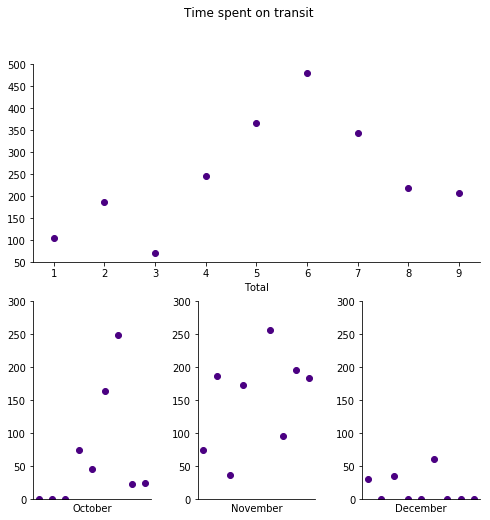

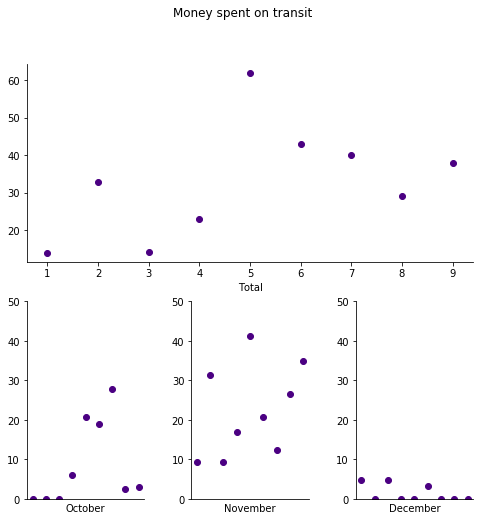

In [8]:
students = [i + 1 for i in range(len(results))]

time_tables = ['total time (minutes)','oct_time (minutes)',
               'nov_time (minutes)', 'dec_time (minutes)']
cost_tables = ['total cost (pounds)', 'oct_cost (pounds)', 
               'nov_cost (pounds)', 'dec_cost (pounds)' ]

tables = [time_tables, cost_tables]


for table in tables: 
    
    fig = plt.figure(figsize=(8, 8))
    grid = plt.GridSpec(2,3, wspace=0.4, hspace=0.2)
    ax1 = plt.subplot(grid[0,:])
    ax1.set_xlabel("Total")
    ax1.spines['right'].set_color('none')
    ax1.spines['top'].set_color('none')
    
    ax2 = plt.subplot(grid[1,0:1])
    ax2.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
    ax2.set_xlabel("October")
    ax2.spines['right'].set_color('none')
    ax2.spines['top'].set_color('none')

    ax3 = plt.subplot(grid[1,1:2])
    ax3.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
    ax3.set_xlabel("November")
    ax3.spines['right'].set_color('none')
    ax3.spines['top'].set_color('none')
    
    
    ax4 = plt.subplot(grid[1,2:])  
    ax4.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
    ax4.set_xlabel("December")
    ax4.spines['right'].set_color('none')
    ax4.spines['top'].set_color('none')

    
    ax1.scatter(students, results[table[0]], c="indigo")
    ax2.scatter(students, results[table[1]] , c="indigo")
    ax3.scatter(students, results[table[2]], c="indigo")
    ax4.scatter(students, results[table[3]], c="indigo")
    
    if table == time_tables: 
        plt.suptitle("Time spent on transit")
        ax2.set_ylim(bottom=0, top=300)
        ax3.set_ylim(bottom=0, top=300)
        ax4.set_ylim(bottom=0, top=300) 
        plt.savefig('TransitTime.png')
        
    else: 
        plt.suptitle("Money spent on transit")
        ax2.set_ylim(bottom=0, top=50)
        ax3.set_ylim(bottom=0, top=50)
        ax4.set_ylim(bottom=0, top=50)
        plt.savefig('TransitCost.png')


#     plt.show()
    

## Which places did we frequent most?  

In [9]:
def destinationCalculator(file): 
    '''
    This function takes in an Oyster card dataset 
    and returns a dictionary containing a count of 
    all stations visited. 
    '''
    end = dict()

    start_end = file[~file['Journey/Action'].str.contains("Bus journey|Topped up|Topped-up|tram|No touch out|No touch-out|Pay as you go", regex=True)]
    for index, row in start_end.iterrows():
        z = re.split(" to ", row["Journey/Action"])

        if z[1] in end.keys(): 
            end[z[1]] += 1 
        else: 
            end[z[1]] = 1 

    return end 

In [10]:
def generatePlaceResults(all_dataframes, destinationCalculator): 
    '''
    This function returns a count for how many times a station was visited. 
    '''

    dest_merged = dict() 
    
    for file in all_dataframes: 
        destinations = destinationCalculator(file)
        for key, value in destinations.items(): 
            if key in dest_merged.keys(): 
                dest_merged[key] += value 
                
            else: 
                dest_merged[key] = value
                
    results_df = pd.DataFrame.from_dict(dest_merged, orient='index')
    results_df = results_df.rename(columns={0: 'Count'})
    
    remove = ['[London Underground]', 
          ' [National Rail]',  
          ' [London Underground / National Rail]',
          ' [DLR / National Rail]', 
          ' (Bakerloo, Circle/District and H&C)',
            'DLR']
    
    for index, row in results_df.iterrows():
        for item in remove: 
            if item in index:  
                new_index = index.replace(item, '')
                results_df.rename(index={index:new_index}, inplace=True)
    
          
    return results_df 

In [12]:
dest_results = generatePlaceResults(all_dataframes, destinationCalculator)
centroid = pd.read_csv("combinedstations.csv")
lat_lon_dict = dict()


for index, row in centroid.iterrows(): 
    if row['name'] in dest_results.index: 
        lat_lon_dict[row['name']] = [row['wkt_geom']]
    
lat = []
long = [] 

for key, value in lat_lon_dict.items():
    value[0] = value[0].replace('Point ', '')
    value[0] = value[0].replace('(', '')
    value[0] = value[0].replace(')', '')
    coords = re.split(" ", value[0])
    lat.append(float(coords[0]))
    long.append(float(coords[1]))   
    

coords_to_add = pd.DataFrame.from_dict(lat_lon_dict, orient='index')
coords_to_add = coords_to_add.rename(columns={0:"Coordinates"})

coords_to_add["lat"] = lat 
coords_to_add["long"] = long

#### Visualization 

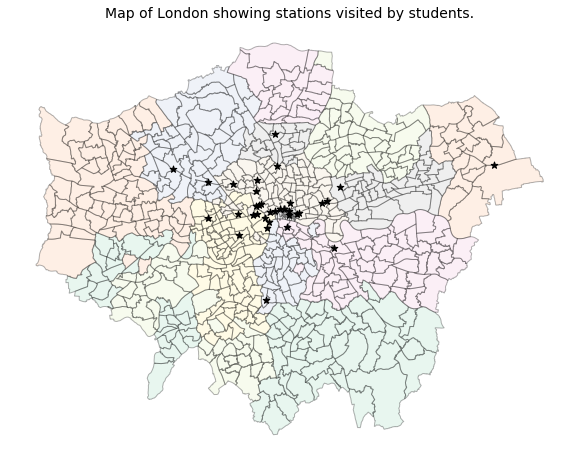

In [13]:
import geopandas as gpd
from shapely.geometry import Point


# Loading the London shapefiles. 
path = "London_Ward.shp"
map_df = gpd.read_file(path)
# Converting the latitudes and longitudes to Geoseries.
gs = gpd.GeoSeries(Point(coords_to_add['lat'][i], coords_to_add['long'][i] ) for i in range(len(coords_to_add)))

# Plotting the results: 
ax1 = map_df.plot(figsize=(10,10), alpha=0.3, edgecolor='k', cmap='Pastel2')
ax2 = gs.plot(ax=ax1, marker='*', color='black', markersize=50 )

ax2.set_title("Map of London showing stations visited by students.", 
              fontdict={'fontsize': 14,
                 'fontweight' : 13})
ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.spines['left'].set_color('none')
ax2.spines['bottom'].set_color('none')
ax2.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax2.tick_params(axis='y', which='both', left=False, labelleft=False)

# plt.savefig('LondonMap.png')

## What are the associations we make with city immersion? 

In [14]:
from wordcloud import WordCloud, STOPWORDS
definitions = pd.read_csv("cityImmersionDefinitions.csv")
definitions = definitions.rename(columns={'What is your definition / understanding of city immersion? ':'Definition'})

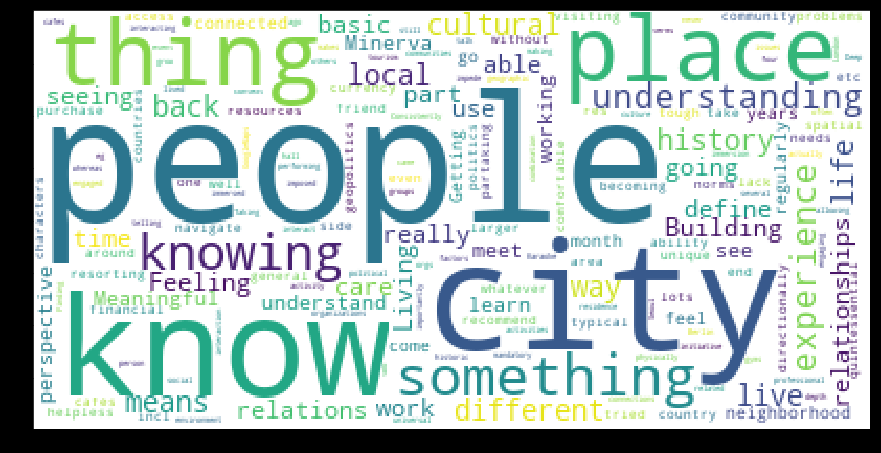

In [15]:
noise_list = ["city", "immersion", "I", "need", "want", "important"]
def remove_noise(input_text):
    words = input_text.split() 
    noise_free_words = [word for word in words if word not in noise_list] 
    noise_free_text = " ".join(noise_free_words) 
    return noise_free_text

for index, row in definitions.iterrows(): 
    row['Definition'] = remove_noise(row['Definition'])

def wordcloud(file,colname):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color="white",stopwords=stopwords).generate(" ".join([i for i in file[colname]]))
    plt.figure( figsize=(15,15), facecolor='k')
    plt.imshow(wordcloud)
    
wordcloud(definitions, 'Definition')